# Model Conparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

### Functions

In [2]:
def map_probabilities_to_masterscale(dataset, probability_column):
    # Assuming the probability_column contains probabilities in percentage form
    probabilities = dataset[probability_column]
    # Replace non-finite values (NaN or inf) with a specific value (e.g., -1)
    probabilities = probabilities.replace([np.inf, -np.inf], np.nan).fillna(-1)
    # Define boundaries for each half-point on the master scale (1 to 9)
    boundaries = [0, 0.48, 0.60, 0.70, 0.90, 1.09, 1.50, 2.50, 3.25, 4.94, 6.87, 9.56, 13.31, 18.53, 25.80, 35.92, 50.00, 100.00]
    # Map probabilities to the master scale based on defined boundaries
    master_scale = pd.cut(probabilities, bins=boundaries, labels=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9])
    # Add the master scale column to the dataset
    dataset[str('MS_'+str(probability_column)[0:-5])] = master_scale.astype('float')  # Use 'float' to handle NaN values as well
    return dataset

def defaults_info(data):
    filtered_data = data[data['TARGET'] == 1]
    distinct_identifiers = filtered_data['IDENTIFIER'].drop_duplicates()
    num_companies_in_default = len(distinct_identifiers)
    print(f"Months in 'default': {len(filtered_data)} rows")
    print(f"Distinct companies in default: {num_companies_in_default} companies")
    percentage_in_default = (len(distinct_identifiers) / data['IDENTIFIER'].nunique()) * 100
    print(f"Percentage of companies in default: {percentage_in_default:.2f}%")


### Importing

In [3]:
test_f = pd.read_csv('test_f.csv')
test_f.head()

,LOAD_DTTM,SECTION_ECONOMIC_ACTIVITY_CD,FLAG_STARTUP,FLAG_ESFL,FLAG_SGPS,ASSET_AMT,TURNOVER_AMT,AUTONOMIA_FINAN_CORRIGIDA_PCT,RESULTADO_OPER_VS_JUROS_SUPOR,AVG_CRED_VENC_VS_RESP_CGA_12M,AVG_CRED_VENC_VS_RESP_BANCA_12M,INDICADOR_CRED_VENC_BANCA_12M,INDICADOR_CRED_VENC_GCA_12M,FLAG_DESCOBERTOS_N_AUT_12M,TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO,RESPONS_BANCA_VS_RENDIMENTO,X_UTR_CD_12M,JUROS_GASTOS_SUPORTADOS_VS_ATIVO,MEIOS_FINAN_PASSIVO_CORRENTE,RESUL_ANTES_IMP_VS_RESP_BANCA,PRAZO_MEDIO_RECEBIMENTO,RESPONS_GCA_VS_RENDIMENTO,NET_DEBT_EBITDA,MARGEM_EXPLO_JUROS_SUPORT,VOLUME_NEG_VS_ACT_CORR,RESPONS_BANCA_VS_EBITDA,CLASSIFICATION_Q,FINAL_RATING_STANDARD,UNEMPLOYMENT_RT,DEFAULT_FLG,IDENTIFIER,EXPOSURE,ever_default,TARGET,LinReg_Prob,RF_Prob,XGB_prob,SVM_prob,KNN_prob,DT_LinReg_Prob,NN_LinReg_Prob
0,2021-05-31,A,0.0,0.0,0.0,2915875.69,86811.87,0.29,1.66,0.0,0.0,0.0,0.0,0,0.79,8.637863,0.0,0.02,0.67,0.015777,366.52,7.939245,14.19,4.74,0.12,18.766794,54.849342,6.0,6.64,0.0,2,2001610.94,0.0,0,4.338757,18.879156,15.263122,7.605692,3.430837e-16,7.768682,5.479988
1,2021-06-30,A,0.0,0.0,0.0,2915875.69,86811.87,0.29,1.66,0.0,0.0,0.0,0.0,0,0.79,9.339737,0.0,0.02,0.67,0.014591,366.52,7.939245,14.19,4.74,0.12,20.291699,54.849342,6.0,6.64,0.0,2,2005314.06,0.0,0,4.338509,18.879156,15.263122,7.610319,3.392789e-16,7.768010,5.468872
2,2021-07-31,A,0.0,0.0,0.0,2915875.69,86811.87,0.29,1.66,0.0,0.0,0.0,0.0,0,0.79,9.188067,0.0,0.02,0.67,0.014832,366.52,7.939245,14.19,4.74,0.12,19.962177,54.849342,6.0,7.39,0.0,2,2009140.63,0.0,0,4.589003,18.879156,15.263122,11.157472,5.758127e-13,8.189353,4.674333
3,2021-08-31,A,0.0,0.0,0.0,2915875.69,86811.87,0.29,1.66,0.0,0.0,0.0,0.0,0,0.79,9.186565,0.0,0.02,0.67,0.014834,366.52,7.939245,14.19,4.74,0.12,19.958916,54.849342,6.0,7.39,0.0,2,2012967.19,0.0,0,4.589003,18.879156,15.263122,11.157458,5.757977e-13,8.189354,4.674345
4,2021-09-30,A,0.0,0.0,0.0,2915875.69,86811.87,0.29,1.66,0.0,0.0,0.0,0.0,0,0.79,9.185273,0.0,0.02,0.67,0.014836,366.52,7.939245,14.19,4.74,0.12,19.956109,56.441009,5.0,7.40,0.0,2,1994428.12,0.0,0,4.103127,18.485556,15.263122,11.243922,1.832759e-14,7.626640,3.768648


In [4]:
len(test_f)

279905

In [5]:
len(test_f[test_f['ever_default']==1]['IDENTIFIER'].unique()) # defaultesd firms

282

In [6]:
len(test_f[test_f['ever_default']==0]['IDENTIFIER'].unique()) # defaultesd firms

10190

In [7]:
len(test_f['IDENTIFIER'].unique()) # defaultesd firms

10472

### NA's in EXPOSURE

In [8]:
missing_proportion_by_column = test_f.isnull().mean(axis=0)
print("Proportion of missing values by column:\n", missing_proportion_by_column)

Proportion of missing values by column:
 LOAD_DTTM                           0.000
SECTION_ECONOMIC_ACTIVITY_CD        0.000
FLAG_STARTUP                        0.000
FLAG_ESFL                           0.000
FLAG_SGPS                           0.000
ASSET_AMT                           0.000
TURNOVER_AMT                        0.000
AUTONOMIA_FINAN_CORRIGIDA_PCT       0.000
RESULTADO_OPER_VS_JUROS_SUPOR       0.000
AVG_CRED_VENC_VS_RESP_CGA_12M       0.000
AVG_CRED_VENC_VS_RESP_BANCA_12M     0.000
INDICADOR_CRED_VENC_BANCA_12M       0.000
INDICADOR_CRED_VENC_GCA_12M         0.000
FLAG_DESCOBERTOS_N_AUT_12M          0.000
TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO    0.000
RESPONS_BANCA_VS_RENDIMENTO         0.000
X_UTR_CD_12M                        0.000
JUROS_GASTOS_SUPORTADOS_VS_ATIVO    0.000
MEIOS_FINAN_PASSIVO_CORRENTE        0.000
RESUL_ANTES_IMP_VS_RESP_BANCA       0.000
PRAZO_MEDIO_RECEBIMENTO             0.000
RESPONS_GCA_VS_RENDIMENTO           0.000
NET_DEBT_EBITDA                    

In [9]:
test_f[test_f['DEFAULT_FLG']==1]['EXPOSURE'].isna().mean()

0.0038053818972546886

In [10]:
test_f[test_f['DEFAULT_FLG']==0]['EXPOSURE'].isna().mean()

0.8541773764960576

## Analysis

In [11]:
# Selecting the columns
data = test_f[['LOAD_DTTM', 'IDENTIFIER', 'EXPOSURE', 'ASSET_AMT', 'DEFAULT_FLG', 'ever_default','TARGET', 'FINAL_RATING_STANDARD', 'LinReg_Prob', 'RF_Prob', 'XGB_prob', 'SVM_prob', 'KNN_prob', 'DT_LinReg_Prob', 'NN_LinReg_Prob']]


## Confusion matrices

In [27]:
from sklearn.metrics import confusion_matrix

# Assuming `df` is your DataFrame and the threshold for classification is 0.5
threshold = 0.5
true_labels = data['TARGET']

# Convert probabilities to binary predictions based on the threshold
xgb_predictions = (data['XGB_prob'] > threshold).astype(int)
dt_lr_predictions = (data['DT_LinReg_Prob'] > threshold).astype(int)
rf_predictions = (data['RF_Prob'] > threshold).astype(int)

# Calculate the confusion matrices
conf_matrix_xgb = confusion_matrix(true_labels, xgb_predictions)
conf_matrix_dt_lr = confusion_matrix(true_labels, dt_lr_predictions)
conf_matrix_rf = confusion_matrix(true_labels, rf_predictions)

# Print the confusion matrices
print('Confusion Matrix for XGBoost:')
print(conf_matrix_xgb)
print('\nConfusion Matrix for Decision Tree Logistic Regression Hybrid:')
print(conf_matrix_dt_lr)
print('\nConfusion Matrix for Random Forest:')
print(conf_matrix_rf)


Confusion Matrix for XGBoost:
[[252153  23345]
 [   326   4081]]

Confusion Matrix for Decision Tree Logistic Regression Hybrid:
[[229519  45979]
 [   198   4209]]

Confusion Matrix for Random Forest:
[[247174  28324]
 [   167   4240]]


### Mapping the probabilities to a masterscale

In [12]:
map_probabilities_to_masterscale(data,'LinReg_Prob')
map_probabilities_to_masterscale(data,'RF_Prob')
map_probabilities_to_masterscale(data,'XGB_prob')
map_probabilities_to_masterscale(data,'SVM_prob')
map_probabilities_to_masterscale(data,'KNN_prob')
map_probabilities_to_masterscale(data,'DT_LinReg_Prob')
map_probabilities_to_masterscale(data,'NN_LinReg_Prob')

,LOAD_DTTM,IDENTIFIER,EXPOSURE,ASSET_AMT,DEFAULT_FLG,ever_default,TARGET,FINAL_RATING_STANDARD,LinReg_Prob,RF_Prob,XGB_prob,SVM_prob,KNN_prob,DT_LinReg_Prob,NN_LinReg_Prob,MS_LinReg,MS_RF,MS_XGB,MS_SVM,MS_KNN,MS_DT_LinReg,MS_NN_LinReg
0,2021-05-31,2,2001610.94,2915875.69,0.0,0.0,0,6.0,4.338757,18.879156,15.263122,7.605692,3.430837e-16,7.768682,5.479988,5.0,7.5,7.0,6.0,1.0,6.0,5.5
1,2021-06-30,2,2005314.06,2915875.69,0.0,0.0,0,6.0,4.338509,18.879156,15.263122,7.610319,3.392789e-16,7.768010,5.468872,5.0,7.5,7.0,6.0,1.0,6.0,5.5
2,2021-07-31,2,2009140.63,2915875.69,0.0,0.0,0,6.0,4.589003,18.879156,15.263122,11.157472,5.758127e-13,8.189353,4.674333,5.0,7.5,7.0,6.5,1.0,6.0,5.0
3,2021-08-31,2,2012967.19,2915875.69,0.0,0.0,0,6.0,4.589003,18.879156,15.263122,11.157458,5.757977e-13,8.189354,4.674345,5.0,7.5,7.0,6.5,1.0,6.0,5.0
4,2021-09-30,2,1994428.12,2915875.69,0.0,0.0,0,5.0,4.103127,18.485556,15.263122,11.243922,1.832759e-14,7.626640,3.768648,5.0,7.0,7.0,6.5,1.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279900,2022-11-30,46168,NaN,3817365.89,0.0,0.0,0,2.0,0.058630,0.013757,0.009027,0.119644,6.610348e-34,0.030385,0.295599,1.0,1.0,1.0,1.0,1.0,1.0,1.0
279901,2022-08-31,46177,NaN,1163282.50,0.0,0.0,0,2.0,0.049455,0.013643,0.009027,0.120825,6.610348e-34,0.024180,0.330517,1.0,1.0,1.0,1.0,1.0,1.0,1.0
279902,2022-09-30,46177,NaN,1163282.50,0.0,0.0,0,2.0,0.049455,0.013643,0.009027,0.120825,6.610348e-34,0.024180,0.330517,1.0,1.0,1.0,1.0,1.0,1.0,1.0
279903,2022-10-31,46177,NaN,1163282.50,0.0,0.0,0,2.0,0.049455,0.013643,0.009027,0.120825,6.610348e-34,0.024180,0.330517,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
selected_columns = ['FINAL_RATING_STANDARD', 'MS_LinReg', 'MS_RF', 'MS_XGB', 'MS_SVM', 'MS_KNN', 'MS_DT_LinReg', 'MS_NN_LinReg']
# Calculate the mean for specific columns
selected_column_means = data[selected_columns].mean()
# Display the mean for specific columns
print("Mean for specific columns:")
print(selected_column_means)

Mean for specific columns:
FINAL_RATING_STANDARD    2.820421
MS_LinReg                1.720659
MS_RF                    1.487430
MS_XGB                   1.545707
MS_SVM                   2.272598
MS_KNN                   1.135416
MS_DT_LinReg             1.584770
MS_NN_LinReg             1.846416
dtype: float64


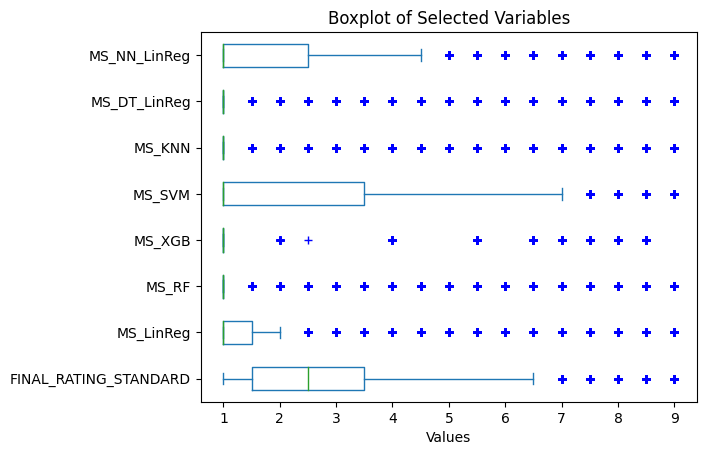

In [14]:
import matplotlib.pyplot as plt
# Create a boxplot for the selected variables
data[selected_columns].plot(kind='box', vert=False, sym='b+')

# Customize the plot if needed
plt.title('Boxplot of Selected Variables')
plt.xlabel('Values')
plt.show()

## Exposure-Weighted Rating (EWR)
Formula: 
$EWR=\frac{\sum_{e,t}\left({\mathrm{EXPOSURE}}_{e,t}\times{\mathrm{RATING}}_{e,t}\right)}{\sum_{e,t}{\mathrm{(EXPOSURE)}}_{e,t}},\left(e,t\right) in P$

In [15]:
#a = data['EXPOSURE']
def ewr(data, column):
    a = data['ASSET_AMT']
    temp = a*data[column]
    return temp.sum()/data['ASSET_AMT'].sum()

In [16]:
ewr_results = {'MODEL': ['FINAL_RATING_STANDARD', 'MS_LinReg', 'MS_RF', 'MS_XGB', 'MS_SVM', 'MS_KNN', 'MS_DT_LinReg', 'MS_NN_LinReg'],
        'EWR': [ewr(data, 'FINAL_RATING_STANDARD'),
                ewr(data, 'MS_LinReg'),
                ewr(data, 'MS_RF'),
                ewr(data, 'MS_XGB'),
                ewr(data, 'MS_SVM'),
                ewr(data, 'MS_KNN'),
                ewr(data, 'MS_DT_LinReg'),
                ewr(data, 'MS_NN_LinReg')]}

ewr_results = pd.DataFrame(ewr_results)

# Sorting the DataFrame based on the 'EWR' column
ewr_results = ewr_results.sort_values(by='EWR', ascending=True)

# Displaying the ordered table
print(ewr_results)

                   MODEL       EWR
5                 MS_KNN  1.143034
2                  MS_RF  1.631414
6           MS_DT_LinReg  1.694191
3                 MS_XGB  1.715489
1              MS_LinReg  1.835005
7           MS_NN_LinReg  1.873206
4                 MS_SVM  2.387380
0  FINAL_RATING_STANDARD  3.021267


## Exposure Weighted Distance to Default (EWDD)

$EWDD_n=\frac{\sum_{d}\left({\mathrm{EXPOSURE}}_{d,t}\times\left(9-{\mathrm{RATING}}_{d,t-n}\right)\right)}{\sum_{d}\left({\mathrm{EXPOSURE}}_{d,t}\right)}, d in  P$ 

In [17]:
Id_ever_d = data[['IDENTIFIER', 'ever_default']].drop_duplicates()
Id_ever_d = Id_ever_d[Id_ever_d['ever_default']== 1]
data_d = data[data['IDENTIFIER'].isin(Id_ever_d['IDENTIFIER'])]
len(data_d)

7627

In [18]:
def dd(dataset, rating, n_months):
    dataset = dataset.copy()
    dataset['LOAD_DTTM'] = pd.to_datetime(dataset['LOAD_DTTM'])
    defaults = dataset[dataset['DEFAULT_FLG'] == 1]
    total_sum = 0
    sum_expo = 0
    c = 0
    Ids = dataset['IDENTIFIER'].drop_duplicates()
    for Id in Ids:
        default_dates = defaults[defaults['IDENTIFIER'] == Id]
        first_default = default_dates['LOAD_DTTM'].min()
        default_row = defaults[defaults['LOAD_DTTM'] == first_default]
        target_date = first_default - pd.DateOffset(months=n_months)
        filtered_rows = dataset[(dataset['LOAD_DTTM'] <= target_date+ pd.DateOffset(days=15)) & (dataset['IDENTIFIER'] == Id)]
        filtered_row = filtered_rows[filtered_rows['LOAD_DTTM'] == filtered_rows['LOAD_DTTM'].max()]
        if len(filtered_row) == 1:
            one_firm = ((9 - filtered_row[rating].iloc[0])* default_row['EXPOSURE'].iloc[0])
            if not np.isnan(one_firm):
                total_sum += one_firm
                sum_expo += default_row['EXPOSURE'].iloc[0]
                c+=1
    return total_sum/sum_expo

In [19]:
dd3_results = {'MODEL': ['FINAL_RATING_STANDARD', 'MS_LinReg', 'MS_RF', 'MS_XGB', 'MS_SVM', 'MS_KNN', 'MS_DT_LinReg', 'MS_NN_LinReg'],
          'EWDD3': [dd(data_d, 'FINAL_RATING_STANDARD', 3),
                  dd(data_d, 'MS_LinReg', 3),
                  dd(data_d, 'MS_RF', 3),
                  dd(data_d, 'MS_XGB', 3),
                  dd(data_d, 'MS_SVM', 3),
                  dd(data_d, 'MS_KNN', 3),
                  dd(data_d, 'MS_DT_LinReg', 3),
                  dd(data_d, 'MS_NN_LinReg', 3)]}

dd3_results = pd.DataFrame(dd3_results)

# Sorting the DataFrame based on the 'DD3' column
dd3_results = dd3_results.sort_values(by='EWDD3', ascending=True)

# Displaying the ordered table
#print(dd3_results)

dd6_results = {'MODEL': ['FINAL_RATING_STANDARD', 'MS_LinReg', 'MS_RF', 'MS_XGB', 'MS_SVM', 'MS_KNN', 'MS_DT_LinReg', 'MS_NN_LinReg'],
               'EWDD6': [dd(data_d, 'FINAL_RATING_STANDARD', 6),
                       dd(data_d, 'MS_LinReg', 6),
                       dd(data_d, 'MS_RF', 6),
                       dd(data_d, 'MS_XGB', 6),
                       dd(data_d, 'MS_SVM', 6),
                       dd(data_d, 'MS_KNN', 6),
                       dd(data_d, 'MS_DT_LinReg', 6),
                       dd(data_d, 'MS_NN_LinReg', 6)]}

dd6_results = pd.DataFrame(dd6_results)
# Sorting the DataFrame based on the 'DD6' column
dd6_results = dd6_results.sort_values(by='EWDD6', ascending=True)
# Displaying the ordered table
#print(dd6_results)

dd9_results = {'MODEL': ['FINAL_RATING_STANDARD', 'MS_LinReg', 'MS_RF', 'MS_XGB', 'MS_SVM', 'MS_KNN', 'MS_DT_LinReg', 'MS_NN_LinReg'],
               'EWDD9': [dd(data_d, 'FINAL_RATING_STANDARD', 9),
                       dd(data_d, 'MS_LinReg', 9),
                       dd(data_d, 'MS_RF', 9),
                       dd(data_d, 'MS_XGB', 9),
                       dd(data_d, 'MS_SVM', 9),
                       dd(data_d, 'MS_KNN', 9),
                       dd(data_d, 'MS_DT_LinReg', 9),
                       dd(data_d, 'MS_NN_LinReg', 9)]}

dd9_results = pd.DataFrame(dd9_results)

# Sorting the DataFrame based on the 'DD9' column
dd9_results = dd9_results.sort_values(by='EWDD9', ascending=True)

# Displaying the ordered table
#print(dd9_results)

# Final table

In [20]:
merged_table = pd.merge(dd3_results, dd6_results, on='MODEL').merge(dd9_results, on='MODEL').merge(ewr_results, on='MODEL')

# Sort the DataFrame based on the specified columns in ascending order
merged_table = merged_table.sort_values(by=['EWDD3', 'EWDD6', 'EWDD9', 'EWR'], ascending=[True, True, True, True])

# Displaying the ordered table
print(merged_table)

                   MODEL     EWDD3     EWDD6     EWDD9       EWR
0                 MS_XGB  2.518697  2.467231  3.008609  1.715489
1           MS_DT_LinReg  2.852526  2.795557  3.244707  1.694191
2                  MS_RF  2.910339  2.688763  3.198908  1.631414
3  FINAL_RATING_STANDARD  2.948870  2.917899  3.475747  3.021267
4              MS_LinReg  3.169504  3.093784  3.640621  1.835005
5           MS_NN_LinReg  3.745882  3.582538  3.957678  1.873206
6                 MS_SVM  4.144051  4.543564  4.650761  2.387380
7                 MS_KNN  5.233680  5.681807  6.033033  1.143034


In [21]:
# Assuming merged_table is your original DataFrame as shown above
base_row = merged_table[merged_table['MODEL'] == 'FINAL_RATING_STANDARD']

# Calculate percentage change relative to the base row and round to 1 decimal place
percentage_change_table = merged_table.copy()
for column in ['EWDD3', 'EWDD6', 'EWDD9', 'EWR']:
    base_value = base_row[column].values[0]
    percentage_change_table[column] = ((merged_table[column] - base_value) / base_value * 100).round(1)

# Adding % signs
percentage_change_table['EWDD3'] = percentage_change_table['EWDD3'].astype(str) + '%'
percentage_change_table['EWDD6'] = percentage_change_table['EWDD6'].astype(str) + '%'
percentage_change_table['EWDD9'] = percentage_change_table['EWDD9'].astype(str) + '%'
percentage_change_table['EWR'] = percentage_change_table['EWR'].astype(str) + '%'

# Displaying the new table with percentage changes
print(percentage_change_table)


                   MODEL   EWDD3   EWDD6   EWDD9     EWR
0                 MS_XGB  -14.6%  -15.4%  -13.4%  -43.2%
1           MS_DT_LinReg   -3.3%   -4.2%   -6.6%  -43.9%
2                  MS_RF   -1.3%   -7.9%   -8.0%  -46.0%
3  FINAL_RATING_STANDARD    0.0%    0.0%    0.0%    0.0%
4              MS_LinReg    7.5%    6.0%    4.7%  -39.3%
5           MS_NN_LinReg   27.0%   22.8%   13.9%  -38.0%
6                 MS_SVM   40.5%   55.7%   33.8%  -21.0%
7                 MS_KNN   77.5%   94.7%   73.6%  -62.2%


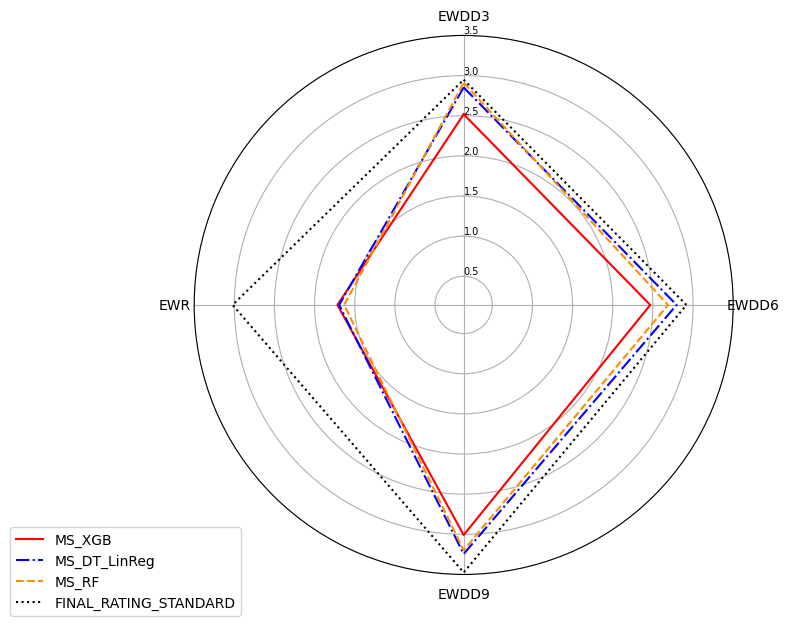

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Assuming `merged_table` is your DataFrame after merging and sorting
# Select only the models you want to plot
models_to_plot = ['MS_XGB', 'MS_DT_LinReg', 'MS_RF', 'FINAL_RATING_STANDARD']
selected_data = merged_table[merged_table['MODEL'].isin(models_to_plot)]

# Set data for plotting
labels=np.array(['EWDD3', 'EWDD6', 'EWDD9', 'EWR'])  # Order of axes
num_vars = len(labels)

# Create a figure
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Compute angle each axis will be on the radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Repeat the first value to close the circle

# Function to create the radar chart
def add_to_radar(model, color, linestyle):
    values = selected_data[selected_data['MODEL'] == model].iloc[0].drop('MODEL').values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, color=color, linestyle=linestyle, linewidth=1.5, label=model)
    #ax.fill(angles, values, color=color, alpha=0.25)

# Set the angle where DD3 will be placed on top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="black", size=7)
plt.ylim(min(merged_table[labels].min()) - 1, 3.5)

# Add each model to the radar chart
add_to_radar('MS_XGB', 'red', 'solid')  # Solid line for XGB
add_to_radar('MS_DT_LinReg', 'blue', 'dashdot')  # Dotted line for DT_LR
add_to_radar('MS_RF', 'darkorange', 'dashed')  # Dash-dot line for RF
add_to_radar('FINAL_RATING_STANDARD', 'black', 'dotted')

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the plot
plt.show()


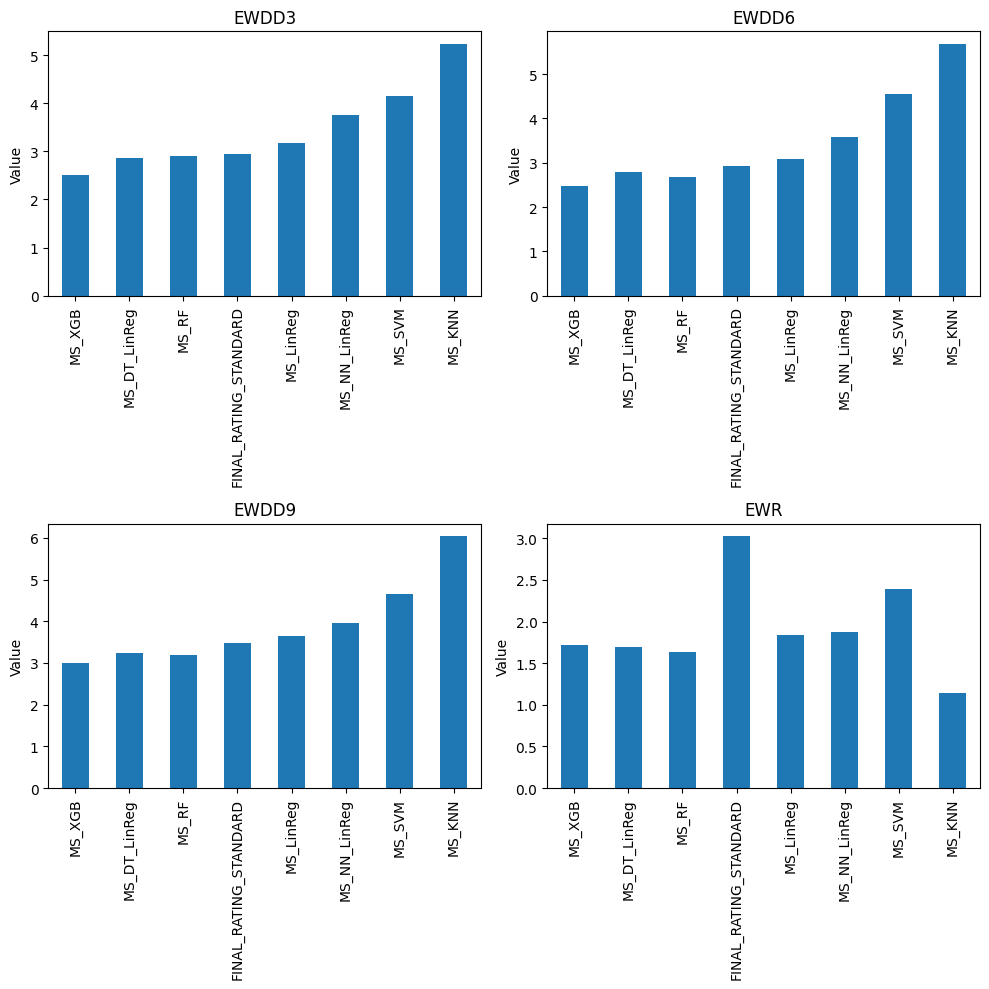

In [23]:
merged_table.set_index('MODEL', inplace=True)


fig, axes = plt.subplots(2, 2, figsize=(10, 10))  

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Bar plots for each metric
for i, column in enumerate(merged_table.columns):
    merged_table[column].plot(kind='bar', ax=axes[i])  # You can choose your color
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
def calculate_dd_values(dataset, rating, n_months):
    dataset = dataset.copy()
    dataset['LOAD_DTTM'] = pd.to_datetime(dataset['LOAD_DTTM'])
    defaults = dataset[dataset['DEFAULT_FLG'] == 1]
    dd_values = []  # List to store the DD values for each firm
    ids = dataset['IDENTIFIER'].drop_duplicates()
    for id_ in ids:
        default_dates = defaults[defaults['IDENTIFIER'] == id_]
        first_default = default_dates['LOAD_DTTM'].min()
        target_date = first_default - pd.DateOffset(months=n_months)
        filtered_rows = dataset[(dataset['LOAD_DTTM'] <= target_date) & (dataset['IDENTIFIER'] == id_)]
        filtered_row = filtered_rows[filtered_rows['LOAD_DTTM'] == filtered_rows['LOAD_DTTM'].max()]
        
        if not filtered_row.empty:
            one_firm_dd = ((9 - filtered_row[rating].iloc[0]) * filtered_row['EXPOSURE'].iloc[0])
            if not np.isnan(one_firm_dd):
                dd_values.append(one_firm_dd)
    return dd_values


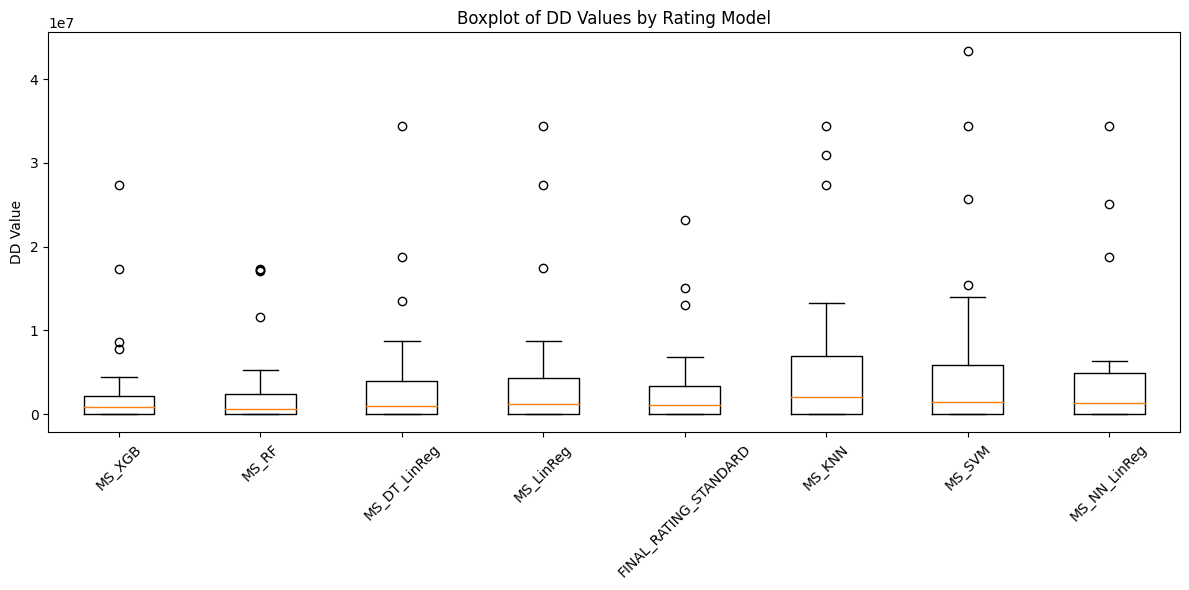

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_d' is your DataFrame with the relevant data already loaded.

# List of rating columns to calculate DD values for
ratings = ['MS_XGB', 'MS_RF', 'MS_DT_LinReg', 'MS_LinReg', 'FINAL_RATING_STANDARD', 'MS_KNN', 'MS_SVM', 'MS_NN_LinReg']

# Calculate DD values for each rating
dd_values_by_rating = {rating: calculate_dd_values(data_d, rating, 9) for rating in ratings}

# Plotting all the DD values together in a boxplot
plt.figure(figsize=(12, 6))  # Increase figure size for clarity
plt.boxplot([dd_values_by_rating[rating] for rating in ratings], labels=ratings)
plt.title('Boxplot of DD Values by Rating Model')
plt.ylabel('DD Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout if necessary
plt.show()